In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/ecom.csv', encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
263638,560025,21975,PACK OF 60 DINOSAUR CAKE CASES,2.0,7/14/2011 13:00,0.55,18283.0,United Kingdom
263639,560025,21981,PACK OF 12 WOODLAND TISSUES,2.0,7/14/2011 13:00,0.29,18283.0,United Kingdom
263640,560025,21982,PACK OF 12 SUKI TISSUES,1.0,7/14/2011 13:00,0.29,18283.0,United Kingdom
263641,560025,22614,PACK OF 12 SPACEBOY TISSUES,2.0,7/14/2011 13:00,0.29,18283.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263643 entries, 0 to 263642
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    263643 non-null  object 
 1   StockCode    263643 non-null  object 
 2   Description  262685 non-null  object 
 3   Quantity     263642 non-null  float64
 4   InvoiceDate  263642 non-null  object 
 5   UnitPrice    263642 non-null  float64
 6   CustomerID   188090 non-null  float64
 7   Country      263642 non-null  object 
dtypes: float64(3), object(5)
memory usage: 16.1+ MB


In [7]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
263638,False,False,False,False,False,False,False,False
263639,False,False,False,False,False,False,False,False
263640,False,False,False,False,False,False,False,False
263641,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description      958
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     75553
Country            1
dtype: int64

In [9]:
df = df.dropna()

In [10]:
neg_index = df[(df['Quantity']<0) | (df['UnitPrice']<=0)].index
df = df.drop(neg_index)

In [11]:
df.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
183530,560025,22417,PACK OF 60 SPACEBOY CAKE CASES,2.0,7/14/2011 13:00,0.55,18283.0,United Kingdom
183531,560025,21975,PACK OF 60 DINOSAUR CAKE CASES,2.0,7/14/2011 13:00,0.55,18283.0,United Kingdom
183532,560025,21981,PACK OF 12 WOODLAND TISSUES,2.0,7/14/2011 13:00,0.29,18283.0,United Kingdom
183533,560025,21982,PACK OF 12 SUKI TISSUES,1.0,7/14/2011 13:00,0.29,18283.0,United Kingdom


In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,183535.000000,183535.000000,183535.000000
mean,13.315814,3.255396,15294.996725
std,179.110136,23.295367,1729.485290
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13867.000000
50%,6.000000,1.950000,15172.000000
75%,12.000000,3.750000,16843.000000
max,74215.000000,8142.750000,18287.000000


In [13]:
#Calulating total bill amount
df['Total_Amount'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


EDA AND VISUALISATIONS

In [14]:
top_10_country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_country_sales

,Country,Total_Amount
0,United Kingdom,3437760.141
1,Netherlands,139844.570
2,Germany,112711.280
3,EIRE,107907.410
4,France,96274.230
5,Australia,84364.110
6,Spain,32937.040
7,Switzerland,24640.080
8,Japan,23041.770
9,Sweden,19698.880


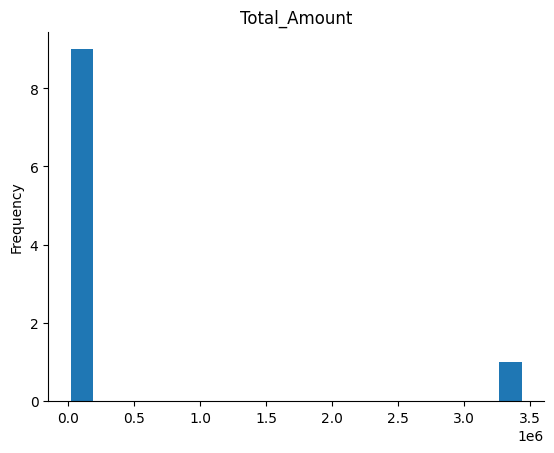

In [15]:
from matplotlib import pyplot as plt
top_10_country_sales['Total_Amount'].plot(kind='hist', bins=20, title='Total_Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
orders_count = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
orders_count.head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,102
2,12348.0,Finland,28
3,12350.0,Norway,17
4,12352.0,Norway,38


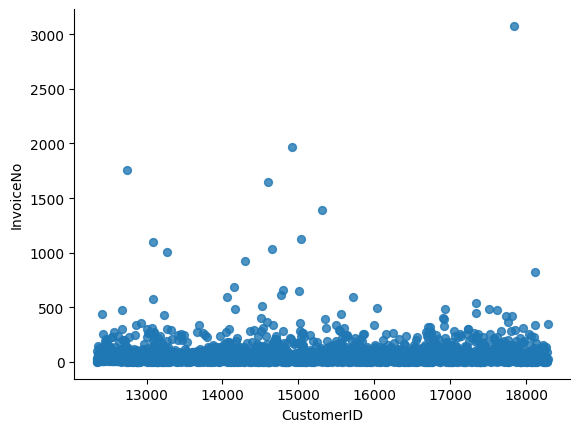

In [17]:
# @title CustomerID vs InvoiceNo

from matplotlib import pyplot as plt
orders_count.plot(kind='scatter', x='CustomerID', y='InvoiceNo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 0, 'Quantity')

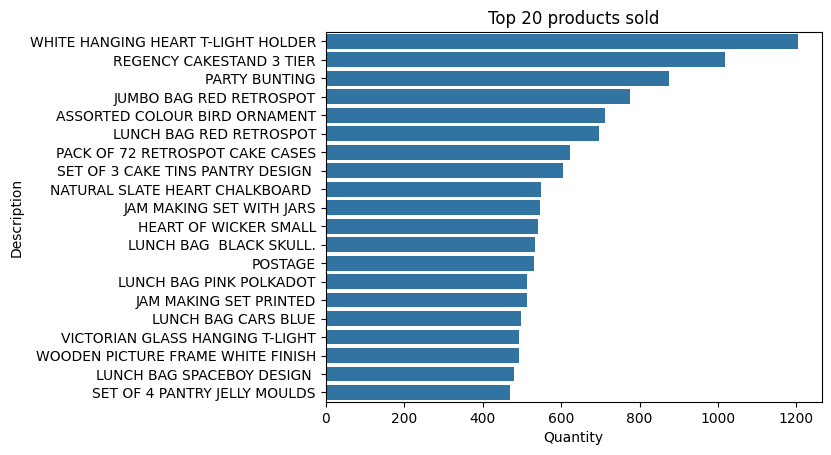

In [18]:
sns.barplot(x = df.Description.value_counts().head(20), y = df.Description.value_counts().head(20).index)
plt.title("Top 20 products sold")
plt.xlabel("Quantity")

Feature Engineering and Data Transformation

In [19]:
# Create a new column 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [20]:
annual_bill = df.groupby('CustomerID')['TotalPrice'].sum()


In [21]:
df= df.merge(annual_bill, on='CustomerID', suffixes=('','_annualy'))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,TotalPrice,TotalPrice_annualy
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,15.30,5391.21
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,22.00,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34,5391.21
...,...,...,...,...,...,...,...,...,...,...,...
183530,559993,23000,TRAVEL CARD WALLET TRANSPORT,1.0,7/14/2011 12:42,0.42,14716.0,United Kingdom,0.42,0.42,188.56
183531,559993,85211,S/4 GROOVY CAT MAGNETS,4.0,7/14/2011 12:42,0.79,14716.0,United Kingdom,3.16,3.16,188.56
183532,559993,16238,PARTY TIME PENCIL ERASERS,18.0,7/14/2011 12:42,0.21,14716.0,United Kingdom,3.78,3.78,188.56
183533,559993,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,2.0,7/14/2011 12:42,2.08,14716.0,United Kingdom,4.16,4.16,188.56


In [22]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [23]:

df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [24]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Amount,TotalPrice,TotalPrice_annualy,Month,Day,Hour
count,183535.000000,183535,183535.000000,183535.000000,183535.000000,183535.000000,183535.000000,183535.000000,183535.000000,183535.000000
mean,13.315814,2011-03-26 04:31:07.540578048,3.255396,15294.996725,22.972844,22.972844,5362.511828,5.056638,14.223331,12.618689
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,0.001000,2.900000,1.000000,1.000000,7.000000
25%,2.000000,2011-01-30 12:42:00,1.250000,13867.000000,5.040000,5.040000,716.320000,3.000000,7.000000,11.000000
50%,6.000000,2011-03-29 13:33:00,1.950000,15172.000000,12.600000,12.600000,1653.420000,5.000000,13.000000,12.000000
75%,12.000000,2011-05-22 11:49:00,3.750000,16843.000000,19.800000,19.800000,3755.760000,6.000000,21.000000,14.000000
max,74215.000000,2011-07-14 13:00:00,8142.750000,18287.000000,77183.600000,77183.600000,136002.110000,12.000000,31.000000,20.000000
std,179.110136,NaN,23.295367,1729.485290,215.454372,215.454372,13881.712505,3.302932,8.321212,2.300023


Data Transformation

In [25]:
df['Log_Annual_Spending'] = np.log1p(df['Total_Amount'])

(array([1.7062e+04, 5.2934e+04, 8.6043e+04, 2.0994e+04, 5.4520e+03,
        8.6100e+02, 1.6300e+02, 2.3000e+01, 1.0000e+00, 2.0000e+00]),
 array([9.99500333e-04, 1.12629507e+00, 2.25159065e+00, 3.37688622e+00,
        4.50218179e+00, 5.62747737e+00, 6.75277294e+00, 7.87806851e+00,
        9.00336409e+00, 1.01286597e+01, 1.12539552e+01]),
 <BarContainer object of 10 artists>)

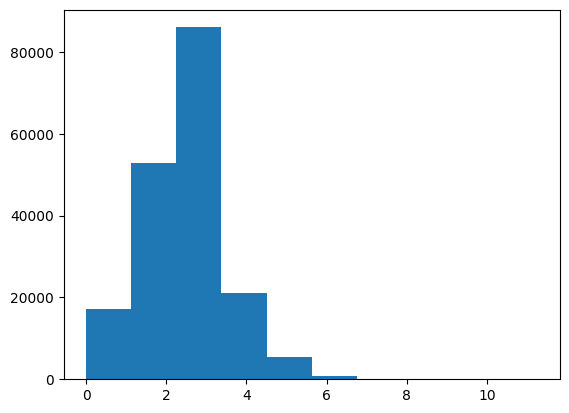

In [26]:
plt.hist(df['Log_Annual_Spending'])

In [27]:
# Encode categorical variables (Country) using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country_Encoded'] = le.fit_transform(df['Country'])

Predictive Model Building

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error , r2_score

In [29]:
df['Description'] = LabelEncoder().fit_transform(df['Description'])
df['Country'] = LabelEncoder().fit_transform(df['Country'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,TotalPrice,TotalPrice_annualy,Month,Day,Hour,Log_Annual_Spending,Country_Encoded
0,536365,85123A,3254,6.0,2010-12-01 08:26:00,2.55,17850.0,34,15.30,15.30,5391.21,12,1,8,2.791165,34
1,536365,71053,3262,6.0,2010-12-01 08:26:00,3.39,17850.0,34,20.34,20.34,5391.21,12,1,8,3.060583,34
2,536365,84406B,787,8.0,2010-12-01 08:26:00,2.75,17850.0,34,22.00,22.00,5391.21,12,1,8,3.135494,34
3,536365,84029G,1622,6.0,2010-12-01 08:26:00,3.39,17850.0,34,20.34,20.34,5391.21,12,1,8,3.060583,34
4,536365,84029E,2472,6.0,2010-12-01 08:26:00,3.39,17850.0,34,20.34,20.34,5391.21,12,1,8,3.060583,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183530,559993,23000,3091,1.0,2011-07-14 12:42:00,0.42,14716.0,34,0.42,0.42,188.56,7,14,12,0.350657,34
183531,559993,85211,2594,4.0,2011-07-14 12:42:00,0.79,14716.0,34,3.16,3.16,188.56,7,14,12,1.425515,34
183532,559993,16238,2105,18.0,2011-07-14 12:42:00,0.21,14716.0,34,3.78,3.78,188.56,7,14,12,1.564441,34
183533,559993,22411,1595,2.0,2011-07-14 12:42:00,2.08,14716.0,34,4.16,4.16,188.56,7,14,12,1.640937,34


In [30]:
X = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'Month', 'Day', 'Hour', 'Log_Annual_Spending', 'Country_Encoded']]
y = df['Total_Amount']


In [31]:
X_train, X_test, y_train,y_test = train_test_split(X, y , test_size=0.25)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(137651, 12)
(45884, 12)
(137651,)
(45884,)


Linear Regression

In [34]:
# Identify columns with object (string) dtype
object_cols = X_train.select_dtypes(include='object').columns
print(object_cols)

# Apply LabelEncoder to object columns
for col in object_cols:
    X_train[col] = LabelEncoder().fit_transform(X_train[col])
    X_test[col] = LabelEncoder().fit_transform(X_test[col])  # Apply to test set as well

#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

Index(['InvoiceNo', 'StockCode'], dtype='object')


LinearRegression()

In [38]:
y_pred_train = lin_reg.predict(X_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R-Squared:', r2_score(y_train, y_pred_train))

MAE: 15.150143092789909
MSE: 12789.906933562375
RMSE: 113.09247072003677
R-Squared: 0.2126877718100878


In [40]:
y_pred = lin_reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R-Squared:', r2_score(y_test, y_pred))

MAE: 15.783833462209744
MSE: 10371.606299376577
RMSE: 101.84108355362574
R-Squared: 0.9242624703981254


Decision Tree

In [41]:
dt_reg = DecisionTreeRegressor(random_state = 123)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [42]:
y_pred_train = dt_reg.predict(X_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 1.4263957127443014e-13
MSE: 1.158319802610394e-25
RMSE: 3.40340976464838e-13
R2_LINEAR: 1.0


In [43]:
y_pred = dt_reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 0.9015170647721793
MSE: 31849.690345647756
RMSE: 178.46481542771323
R2_LINEAR: 0.7674210921880991


Random Forest Regression

In [45]:
rf_reg = RandomForestRegressor(random_state=123)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [46]:
y_pred_train = rf_reg.predict(X_train)
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', mean_squared_error(y_train, y_pred_train)**0.5)
print('R2_LINEAR:', r2_score(y_train, y_pred_train))

MAE: 0.11016892961189921
MSE: 1043.4967666554144
RMSE: 32.30320056365026
R2_LINEAR: 0.935765149134231


In [47]:
y_pred = rf_reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('R2_LINEAR:', r2_score(y_test, y_pred))

MAE: 1.1349605934531104
MSE: 54721.42973842372
RMSE: 233.92612025685315
R2_LINEAR: 0.6004026970325816


Customer Segmentation

In [48]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [50]:
new_column_name = {'TotalSpending_AnnualSpending': 'Annual_Spending'}
df.rename(columns=new_column_name, inplace=True)

In [52]:
most_recent_date = df['InvoiceDate'].max()

rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}, inplace=True)

In [53]:
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,177,1,77183.60
12347.0,34,4,2205.95
12348.0,100,3,1487.24
12350.0,161,1,334.40
12352.0,113,5,1561.81


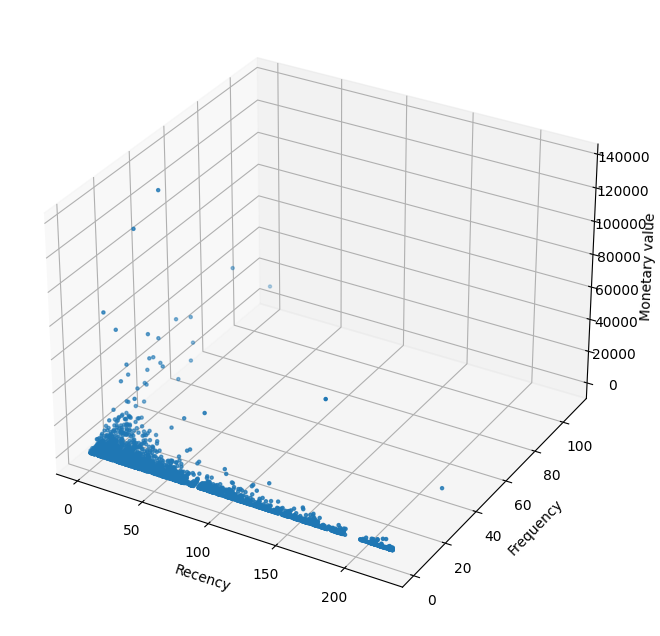

In [54]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_data.Recency
ys=rfm_data.Frequency
zs=rfm_data.MonetaryValue
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [56]:
# Standardize the RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [57]:
# Apply K-Means clustering to create clusters based on RFM metrics

kmeans = KMeans(n_clusters=4, random_state= 42)
rfm_data['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:

print("K-Means Clustering:")
print(rfm_data['KMeans_Cluster'].value_counts())

K-Means Clustering:
KMeans_Cluster
3    1943
0    1064
2      28
1       5
Name: count, dtype: int64


In [59]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
rfm_data['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

In [60]:
print("\nAgglomerative Hierarchical Clustering:")
print(rfm_data['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering:
Agg_Cluster
0    1881
2    1131
3      17
1      11
Name: count, dtype: int64


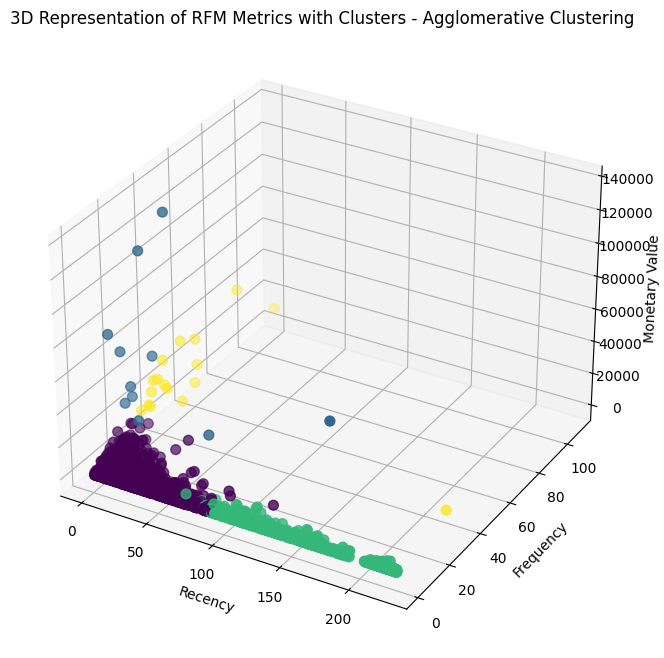

In [62]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['Agg_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters - Agglomerative Clustering')
plt.show()

Interpretation Results

### High Recency, High Frequency, High Monetary

Customers in this segment have high recency, indicating their transactions are not recent. However, they shop regularly, as shown by their high frequency, and have a high monetary value, meaning they spend significantly more than other groups. This group exemplifies the best customers and the most profitable for the business. Personalized incentives and loyalty programs should be used to reward and retain them.

### Low Recency, High Frequency, High Monetary

Customers in this group have low recency, indicating they have made recent purchases. They buy frequently, as evidenced by their high frequency, and have a high monetary value, indicating significant spending. This segment includes loyal customers who purchase often and contribute significantly to revenue. Personalized recommendations and loyalty incentives are likely to be well-received.

### High Recency, Low Frequency, Low Monetary

Customers in this segment have high recency, indicating infrequent transactions. They also have low frequency, showing they don't make regular purchases, and low monetary value, suggesting lower spending than other categories. These individuals may be potential churned or inactive customers who need re-engagement strategies.

### Low Recency, Low Frequency, Low Monetary

Customers in this group have low recency, indicating recent purchases. However, they have low frequency and low monetary value, indicating infrequent purchases and low spending. This segment includes customers who have recently purchased but haven't shown strong commitment or loyalty. They may need specific incentives or offers to increase their spending and purchase frequency.